In [1]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join("..")))
print(os.path.abspath(os.path.join("..")))

/media/edint/64d115f7-57cc-417b-acf0-7738ac091615/Ivern/WorkSpace/CNN


In [2]:
from dataset import download_dataset

loader_dict = download_dataset()
train_loader = loader_dict["train"]
test_loader = loader_dict["test"]


# CIFAR-10 클래스 이름
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

# 테스트셋에서 일부 샘플 가져오기
dataiter = iter(test_loader)
images, labels = next(dataiter)

In [3]:
from mobilenet.mobilenet_3 import MobileNetV3Small

import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device : {device}")
model = MobileNetV3Small(num_classes=10).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print(f'model exist : {os.path.exists("mobilenetv3_small_cifar10.pth")}')
# 모델을 평가 모드로 전환
model.load_state_dict(torch.load("mobilenetv3_small_cifar10.pth", map_location=device))
model.eval()

Device : cuda
model exist : True


/home/edint/Ivern/WorkSpace/CNN/venv/lib/python3.12/site-packages/torch/cuda/__init__.py:827: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


MobileNetV3Small(
  (model): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): BottleNeck(
      (model): Sequential(
        (0): Sequential(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SEBlock(
          (pool): AdaptiveAvgPool2d(output_size=1)
          (fc): Sequential(
            (0): Linear(in_features=16, out_features=4, bias=True)
            (1): ReLU(inplace=True)
            (2): Linear(in_features=4, out_features=16, bias=True)
            (3): Hardsigmoid()
          )
        )
        (2): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (3): Ba

In [4]:
images, labels = images.to(device), labels.to(device)

# 모델 추론
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

# 시각화를 위해 CPU로 복사
images = images.cpu()
labels = labels.cpu()
predicted = predicted.cpu()


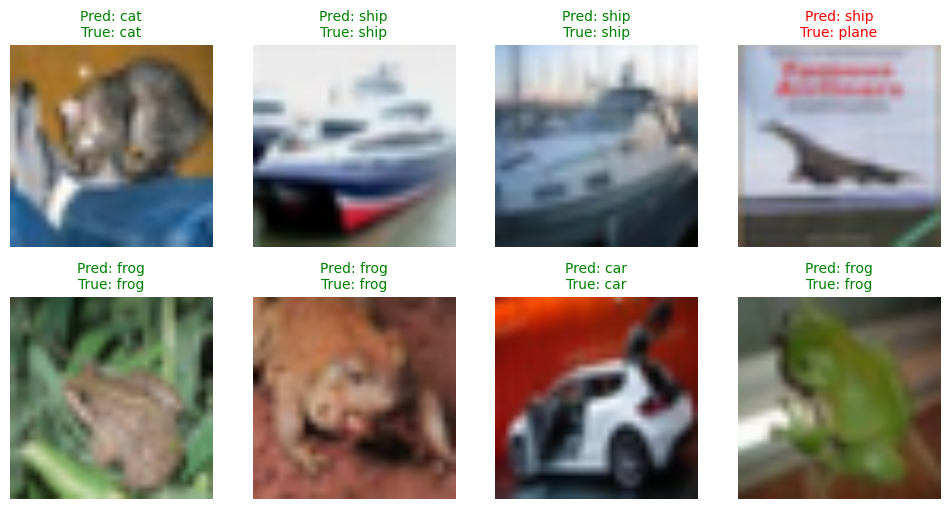

In [5]:
import matplotlib.pyplot as plt

# 랜덤하게 8개 샘플 시각화
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()

for idx in range(8):
    img = images[idx] / 2 + 0.5  # unnormalize ([-1,1] → [0,1])
    npimg = img.numpy().transpose((1, 2, 0))

    axes[idx].imshow(npimg)
    axes[idx].set_title(f"Pred: {classes[predicted[idx]]}\nTrue: {classes[labels[idx]]}",
                        color=('green' if predicted[idx] == labels[idx] else 'red'),
                        fontsize=10)
    axes[idx].axis('off')

In [6]:
corrected_count = 0
failed_count = 0
for label, predict in zip(labels, predicted):
    if label == predict:
        corrected_count += 1
    else:
        failed_count += 1
print(f'Corrected Count : {corrected_count}, Failed Count : {failed_count}')
print(f'Total Count : {corrected_count + failed_count}')
print(f'Corrected Percent : {int(corrected_count / (corrected_count + failed_count) * 100)}%')

Corrected Count : 54, Failed Count : 10
Total Count : 64
Corrected Percent : 84%
